Optimal Solution: 
x:  15.0
y:  10.0
Objective value:  105.0


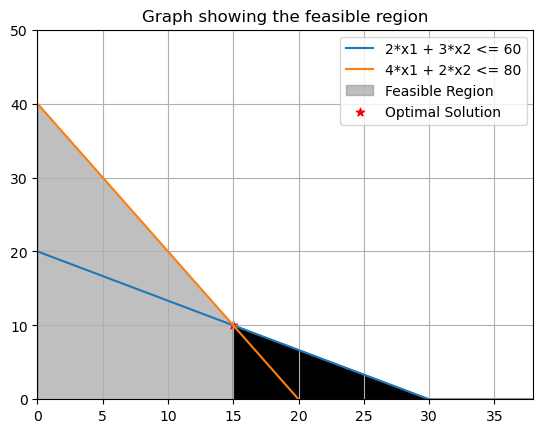

In [19]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

model = LpProblem(name = "Production_Planning", sense=LpMaximize)

x1 = LpVariable("x1", 0)
x2 = LpVariable("x2", 0)

model += 5*x1 + 3*x2

model += 2*x1 + 3*x2 <= 60
model += 4*x1 + 2*x2 <= 80

model.solve()

optimal_x = x1.varValue
optimal_y = x2.varValue
optimal_value = model.objective.value()

print("Optimal Solution: ")
print("x: ", optimal_x)
print("y: ", optimal_y)
print("Objective value: ", optimal_value)


#plotting the graph
x_values = np.linspace(0, 100, 1000)
y1_values = (60-2*x_values)/3
y2_values = (80-4*x_values)/2

plt.plot(x_values, y1_values, label=2*x1 + 3*x2 <= 60)
plt.plot(x_values, y2_values, label=4*x1 + 2*x2 <= 80)

plt.fill_between(x_values, np.maximum(y1_values,y2_values), 0, where=(y1_values>=y2_values), color="black")
plt.fill_between(x_values, np.maximum(y1_values,y2_values), 0, where=(y1_values<=y2_values), color="gray", alpha=0.5, label='Feasible Region')


plt.title("Graph showing the feasible region")
plt.xlim(0,38)
plt.ylim(0,50)
plt.grid(True)
plt.scatter(optimal_x, optimal_y, color="red", marker='*', label="Optimal Solution")
plt.legend()
plt.show()